In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

plt.style.use('fivethirtyeight')

In [2]:
def master_df(chamber):
    master = pd.DataFrame()
    fpath='../congress-data/%s/' % chamber
    files=os.listdir(fpath)
    for file in files:
        
        congress = int(file.split('_')[1].split('.')[0])
        df = pd.read_csv(fpath + file, index_col=0, parse_dates=['dob'])
        df['congress'] = congress
        
        master = master.append(df, ignore_index=True)
    
    return master

In [3]:
house = master_df('house')
senate = master_df('senate')

### Initial Distribution

In [4]:
male_reps = house[house['gender'] == 'M']
female_reps = house[house['gender'] == 'F']

In [5]:
male_missed = male_reps['missed_votes']
male_x = np.zeros(len(male_missed),)

female_missed = female_reps['missed_votes']
female_x = np.ones(len(female_missed))

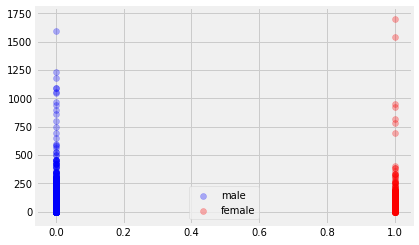

In [6]:
fig, ax = plt.subplots()
ax.scatter(male_x, male_missed, c='b', label='male', alpha=0.3)
ax.scatter(female_x, female_missed, c='r', label='female', alpha=0.3)
ax.legend()

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


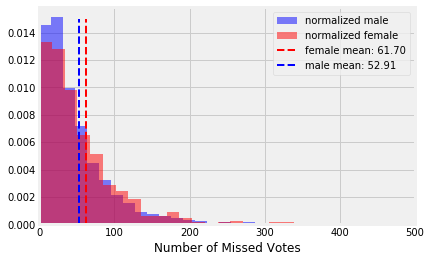

In [16]:
fig, ax = plt.subplots()

female_mean = np.mean(female_missed)
male_mean = np.mean(male_missed)

ax.hist(male_missed, color='b', label='normalized male', bins=100, normed=1, alpha=0.5)
ax.hist(female_missed, color='r', label='normalized female', bins=100, normed=1, alpha=0.5)
ax.vlines(female_mean, 0, 0.015, color='r', linestyle='--', linewidth=2, label='female mean: %.2f' % female_mean)
ax.vlines(male_mean, 0, 0.015, color='b', linestyle='--', linewidth=2, label='male mean: %.2f' % male_mean)
ax.legend()
ax.set_xlim(0, 500)
ax.set_xlabel('Number of Missed Votes');

In [17]:
print('Male Sample Size: %d' % len(male_reps))
print('Female Sample Size: %d' % len(female_reps))

Male Sample Size: 5598
Female Sample Size: 1007


In [18]:
male_sample_mean = []
female_sample_mean = []

for i in range(10000):
    male_sample = np.random.choice(male_missed, 500)
    female_sample = np.random.choice(female_missed, 500)
    
    male_sample_mean.append(np.mean(male_sample))
    female_sample_mean.append(np.mean(female_sample))

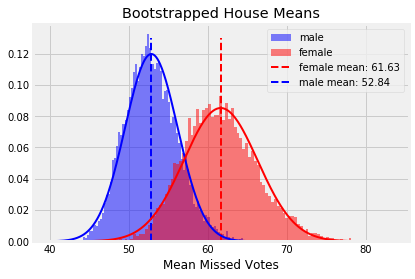

In [19]:
fig, ax = plt.subplots()

male_bootstrapped_mean = np.mean(male_sample_mean)
male_std = np.std(male_sample_mean)
female_bootstrapped_mean = np.mean(female_sample_mean)
female_std = np.std(female_sample_mean)

male_norm = scs.norm(male_bootstrapped_mean, male_std)
female_norm = scs.norm(female_bootstrapped_mean, female_std)


x = np.linspace(40, 80, 500)

ax.hist(male_sample_mean, color='b', label='male', bins=100, alpha=0.5, normed=1)
ax.hist(female_sample_mean, color='r', label='female', bins=100, alpha=0.5, normed=1)
ax.plot(x, male_norm.pdf(x), color='b', linewidth=2)
ax.plot(x, female_norm.pdf(x), color='r', linewidth=2)
ax.vlines(female_bootstrapped_mean, 0, 0.13, color='r', linestyle='--', linewidth=2, label='female mean: %.2f' % female_bootstrapped_mean)
ax.vlines(male_bootstrapped_mean, 0, 0.13, color='b', linestyle='--', linewidth=2, label='male mean: %.2f' % male_bootstrapped_mean)
ax.legend()
ax.set_title('Bootstrapped House Means')
ax.set_xlabel('Mean Missed Votes');

since the bootstrapped means are normal, and the sample sizes are sufficiently large, I can use t-tests to accept or reject my hypothesis.

In [39]:
ttest, p_val = scs.ttest_ind(male_sample_mean, female_sample_mean)
print(p_val)

0.0


In a given session of Congress, female representatives miss 61.68 votes on average, while male representatives miss 52.91 votes on average. The question is, is this significant?

$$H_0: \mu_f = \mu_m$$
$$H_a: \mu_f > \mu_m$$

We want to run a 1-tail t-test. Our alpha threshold will be 0.05.

In [22]:
t_stat, p_val = scs.ttest_ind(male_missed, female_missed)
print(p_val)

0.0013959115090709494


In [42]:
std_err = np.sqrt((np.std(male_missed) ** 2) / len(male_missed) + (np.std(female_missed) ** 2) / len(female_missed))
std_err

3.4445885019482834

In [43]:
t_stat = (np.mean(female_missed) - np.mean(male_missed)) / std_err
t_stat

2.5536424079658566

In [ ]:
 { [ (s12 / n1)2 / (n1 - 1) ] + [ (s22 / n2)2 / (n2 - 1) ] }

In [ ]:
female_std = np.std(female_missed)
male_std = np.std(male_missed)

numerator = (np.std(female_missed) ** 2 / len(female_missed) + np.mean(male_missed) ** 2 / len(male_missed))
denominator = 

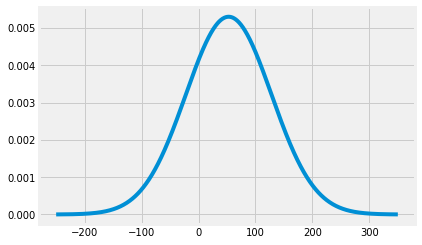

In [32]:
dist = scs.norm(np.mean(male_missed), np.std(male_missed))
fig, ax = plt.subplots()
x = np.linspace(-250, 350, 1000)
ax.plot(x, dist.pdf(x))

In [35]:
dist.cdf(p_val)

0.2408639387078591

In [36]:
male_missed

0        49.0
1       134.0
2        46.0
3        43.0
4         0.0
        ...  
6651     58.0
6652     54.0
6653     92.0
6654     43.0
6655     14.0
Name: missed_votes, Length: 5598, dtype: float64

In [37]:
female_missed

12        7.0
23      124.0
26        9.0
31       24.0
38       48.0
        ...  
6627     37.0
6630     50.0
6634     35.0
6638     51.0
6648     17.0
Name: missed_votes, Length: 1007, dtype: float64